Process data dupicates and None

In [68]:
import pandas as pd

print('-- Importing success')

-- Importing success


In [69]:
df = pd.read_csv('/home/hadoop/Predict-Phone-Price/Stream_data/phone_data_ML.csv')
df.isna().sum()

Hãng sản xuất    0
Bộ nhớ trong_    4
Ram_             9
Chipset(CPU)     8
man hinh         0
pin              0
Primary          0
Ultra_Wide       0
Telephoto        0
Giá              0
dtype: int64

In [70]:
df[df['Giá']=='Liên hệ'].shape

(78, 10)

In [71]:
df_new = df[(df['Giá'] != 'Liên hệ') & (df['pin'] != 0) & (df['Chipset(CPU)'].notna()) & (df['Ram_'].notna()) & (df['Giá'] != 'Cập Nhật')]
df_new.isna().sum()

Hãng sản xuất    0
Bộ nhớ trong_    0
Ram_             0
Chipset(CPU)     0
man hinh         0
pin              0
Primary          0
Ultra_Wide       0
Telephoto        0
Giá              0
dtype: int64

In [72]:
df_new.shape

(374, 10)

In [73]:
df_ = df_new.drop_duplicates()

In [74]:
df_.shape

(354, 10)

In [75]:
df_['Hãng sản xuất'].unique()

array(['Samsung', 'Apple', 'INOI', 'Xiaomi', 'Oppo', 'Realme', 'Tecno',
       'ZTE', 'Vivo', 'BPhone', 'Nokia', 'Oscal', 'TCL'], dtype=object)

Data Normalize

In [76]:
#Encoding 'Hang san xuat'
def map_brand_to_numeric(brand):
    brand_mapping = {
        'Samsung': 1,
        'Apple': 2,
        'Xiaomi': 3,
        'Oppo': 4,
        'Realme': 5,
        'Tecno': 6,
        'ZTE': 7,
        'Vivo': 8,
        'BPhone': 9,
        'Nokia': 10,
        'Google': 11,
        'Oscal': 12, 
        'TCL': 13,
        'INOI': 14
    }
    return brand_mapping.get(brand, 0)

df_['Hãng sản xuất'] = df_['Hãng sản xuất'].apply(map_brand_to_numeric)

/tmp/ipykernel_4149/2385543688.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Hãng sản xuất'] = df_['Hãng sản xuất'].apply(map_brand_to_numeric)


In [77]:
df_.head()

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá
0,1,128.0,4.0,Helio G85,6.7,5000.0,50,2,0,3090000
1,2,128.0,6.0,Apple A15 Bionic,6.1,3279.0,12,12,0,25990000
2,14,256.0,8.0,Unisoc T606 (12 nm),7.0,5000.0,16,2,2,3390000
3,2,128.0,6.0,Apple A16 Bionic,6.1,3200.0,48,12,12,31990000
4,1,256.0,8.0,Snapdragon 8 Gen 2 for Galaxy,6.7,3700.0,12,12,0,25990000


In [78]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 498
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hãng sản xuất  354 non-null    int64  
 1   Bộ nhớ trong_  354 non-null    float64
 2   Ram_           354 non-null    float64
 3   Chipset(CPU)   354 non-null    object 
 4   man hinh       354 non-null    float64
 5   pin            354 non-null    float64
 6   Primary        354 non-null    int64  
 7   Ultra_Wide     354 non-null    int64  
 8   Telephoto      354 non-null    int64  
 9   Giá            354 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.4+ KB


In [79]:
df_['Giá'] = df_['Giá'].astype(float)

/tmp/ipykernel_4149/3019059026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Giá'] = df_['Giá'].astype(float)


In [80]:
df_.describe()

,Hãng sản xuất,Bộ nhớ trong_,Ram_,man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,3.540000e+02
mean,2.963277,198.714689,7.847458,6.644463,4695.163842,47.683616,10.937853,6.050847,1.496691e+07
std,2.250919,128.712432,4.353945,0.914636,1021.065497,43.756491,14.272205,14.288517,1.219070e+07
min,1.000000,1.000000,2.000000,1.800000,1020.000000,0.000000,0.000000,0.000000,7.100000e+05
25%,1.000000,128.000000,6.000000,6.500000,4352.000000,12.000000,2.000000,0.000000,5.490000e+06
50%,3.000000,128.000000,8.000000,6.670000,5000.000000,50.000000,8.000000,2.000000,9.990000e+06
75%,4.000000,256.000000,8.000000,6.700000,5000.000000,50.000000,12.000000,10.000000,2.299000e+07
max,14.000000,512.000000,48.000000,12.400000,10000.000000,200.000000,108.000000,200.000000,5.499000e+07


In [81]:
df_.isnull().sum()

Hãng sản xuất    0
Bộ nhớ trong_    0
Ram_             0
Chipset(CPU)     0
man hinh         0
pin              0
Primary          0
Ultra_Wide       0
Telephoto        0
Giá              0
dtype: int64

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

print('-- Importing success')

-- Importing success


In [83]:
df_.head()

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá
0,1,128.0,4.0,Helio G85,6.7,5000.0,50,2,0,3090000.0
1,2,128.0,6.0,Apple A15 Bionic,6.1,3279.0,12,12,0,25990000.0
2,14,256.0,8.0,Unisoc T606 (12 nm),7.0,5000.0,16,2,2,3390000.0
3,2,128.0,6.0,Apple A16 Bionic,6.1,3200.0,48,12,12,31990000.0
4,1,256.0,8.0,Snapdragon 8 Gen 2 for Galaxy,6.7,3700.0,12,12,0,25990000.0


In [84]:
df_.loc[df_['Ram_'] > 25, 'Ram_'] = df_['Ram_'] / 1024

In [85]:
df_[df_['pin'] > 100000] 

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá


In [86]:
df_[df_['Bộ nhớ trong_'] < 10] 

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá
115,5,1.0,16.0,Snapdragon 7+ Gen 2,6.74,5500.0,64,8,2,9990000.0
147,1,1.0,12.0,Snapdragon 8 Gen 3 (4 nm),6.30,4400.0,50,10,12,54990000.0
252,1,1.0,12.0,Snapdragon 8 Gen 3 (4 nm),6.80,5000.0,200,50,10,44490000.0
343,2,1.0,8.0,Apple A17 Pro (3 nm),6.10,3274.0,48,12,0,43999000.0
344,1,1.0,12.0,Qualcomm SM8550-AC Snapdragon 8 Gen 2 (4 nm),7.60,4400.0,50,12,10,50989000.0
387,2,1.0,6.0,Apple A16 Bionic (4 nm),6.10,3200.0,48,12,12,36989000.0
419,1,1.0,12.0,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),7.60,4200.0,50,10,12,49989000.0
422,2,1.0,8.0,Apple A17 Pro (3 nm),6.70,4441.0,48,12,0,46999000.0
446,1,1.0,12.0,Qualcomm SM8650-AC Snapdragon 8 Gen 3 (4 nm),6.80,5000.0,50,10,12,44490000.0


In [87]:
df_.loc[df_['Bộ nhớ trong_'] < 10, 'Bộ nhớ trong_'] = df_['Bộ nhớ trong_'] * 1024

In [88]:
df_[df_['Bộ nhớ trong_'] < 40] 

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá
9,3,32.0,2.0,MediaTek Helio G36,6.52,5000.0,8,0,0,2990000.0
55,1,32.0,2.0,Unisoc T606 8 nhân,6.50,5000.0,48,2,0,2990000.0
120,4,32.0,3.0,MediaTek Helio G35,6.52,4230.0,13,0,0,3690000.0
135,1,32.0,3.0,Mediatek Helio P35,6.40,5000.0,2,0,0,3390000.0
140,10,32.0,3.0,SC9863A 8 nhân 1.6GHz,6.82,6000.0,13,2,0,3290000.0
188,3,32.0,2.0,MediaTek MT6761 (Helio A22),6.52,5000.0,8,0,0,2190000.0
203,1,32.0,3.0,Unisoc T606 8 nhân,6.50,5000.0,48,2,0,2990000.0
257,10,32.0,3.0,Unisoc T606,6.52,5000.0,50,2,0,3390000.0
306,1,32.0,3.0,Mediatek MT6765 Helio P35 (12nm),6.50,5000.0,13,2,0,3990000.0
349,1,32.0,3.0,Mediatek MT6765 Helio P35 (12nm),6.50,5000.0,13,2,0,3189000.0


1. Distribution of Numerical Features

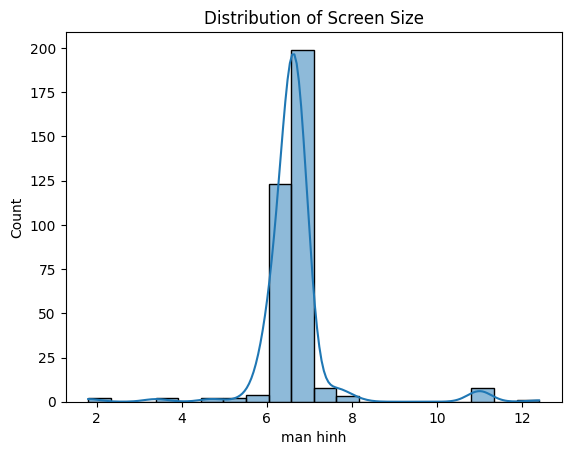

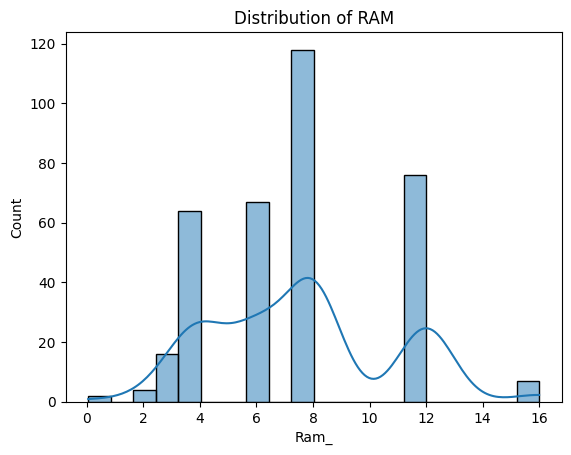

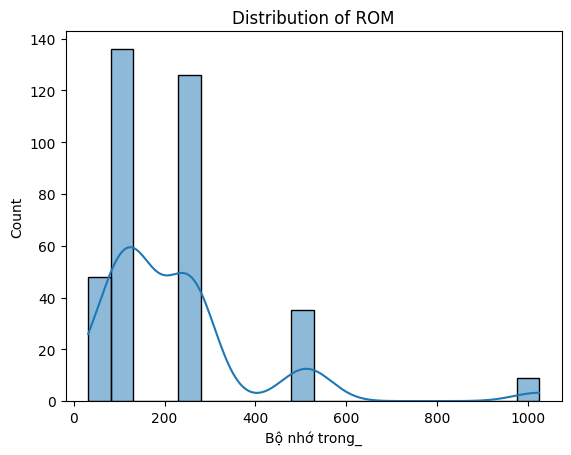

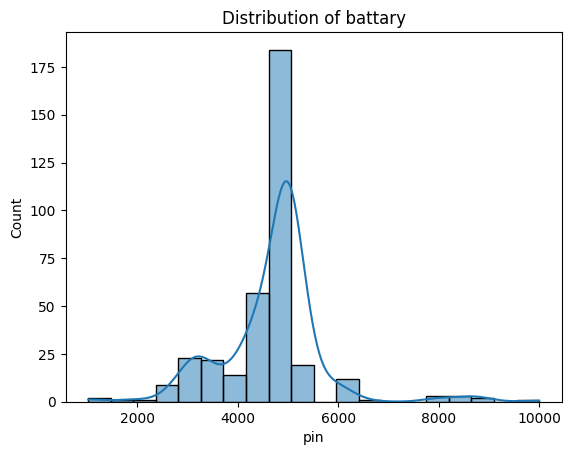

In [89]:
sns.histplot(df_['man hinh'], bins=20, kde=True)
plt.title('Distribution of Screen Size')
plt.show()

sns.histplot(df_['Ram_'], bins=20, kde=True)
plt.title('Distribution of RAM')
plt.show()

sns.histplot(df_['Bộ nhớ trong_'], bins=20, kde=True)
plt.title('Distribution of ROM')
plt.show()

sns.histplot(df_['pin'], bins=20, kde=True)
plt.title('Distribution of battary')
plt.show()

In [90]:
df_[df_['Hãng sản xuất'] == 0] 

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá


2.Categorical Features

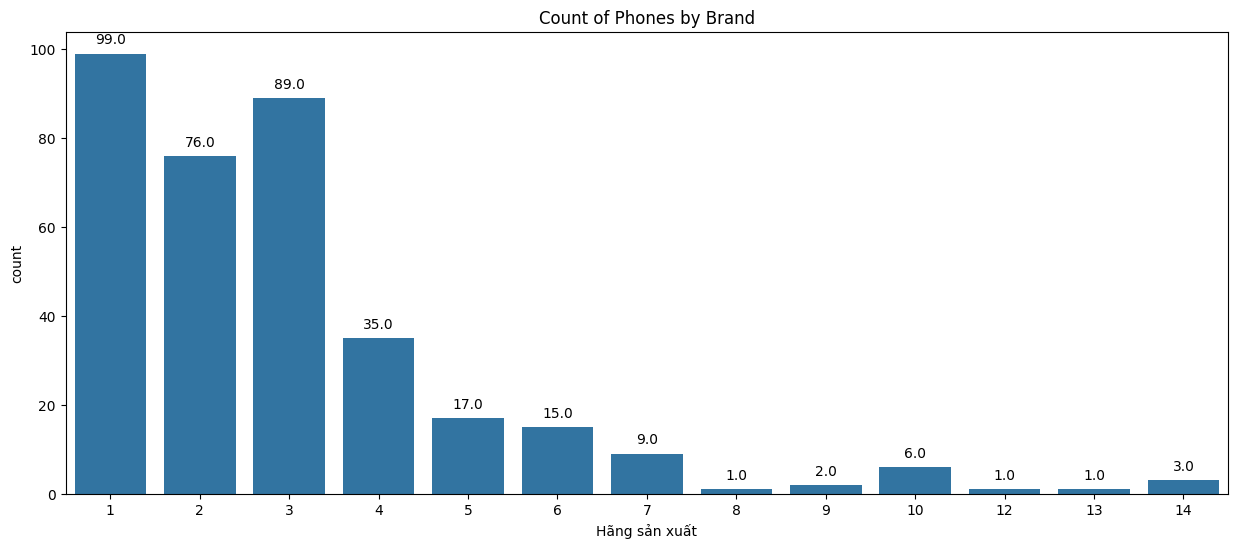

In [100]:
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='Hãng sản xuất', data=df_)
plt.title('Count of Phones by Brand')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

3.Correlation matrix

In [109]:
df_subset = df_.drop(columns=['Chipset(CPU)'])

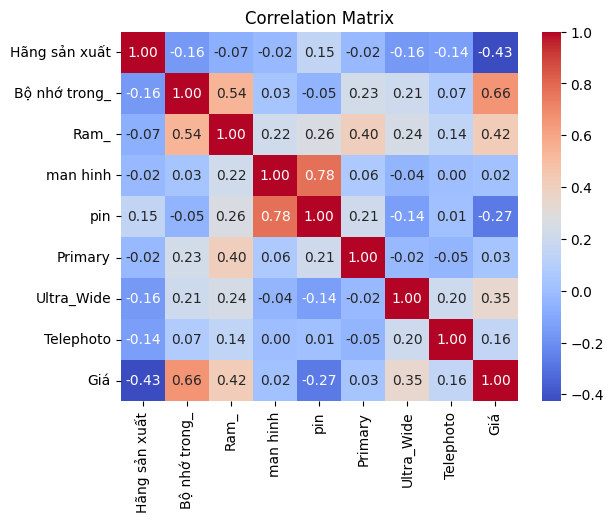

In [110]:
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

4.Price Analysis

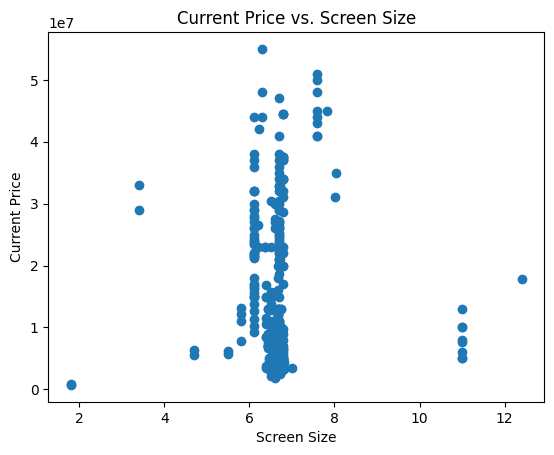

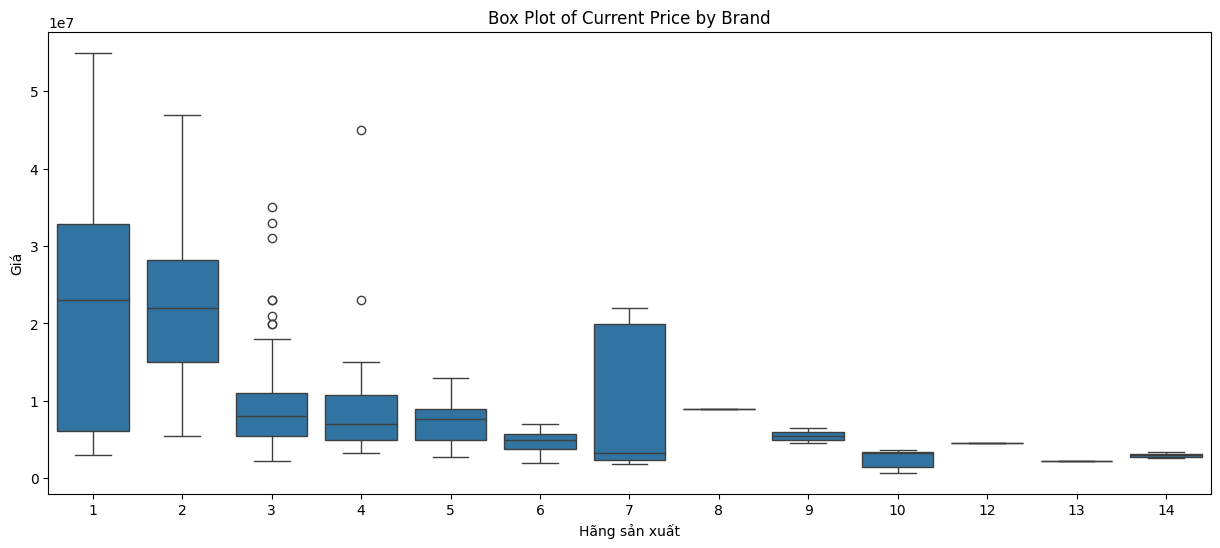

In [114]:
# Scatter plot of current price vs. screen size
plt.scatter(df_['man hinh'], df_['Giá'])
plt.title('Current Price vs. Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Current Price')
plt.show()

# Box plot for current price by brand
plt.figure(figsize=(15, 6))
sns.boxplot(x='Hãng sản xuất', y='Giá', data=df_)
plt.title('Box Plot of Current Price by Brand')
plt.show()


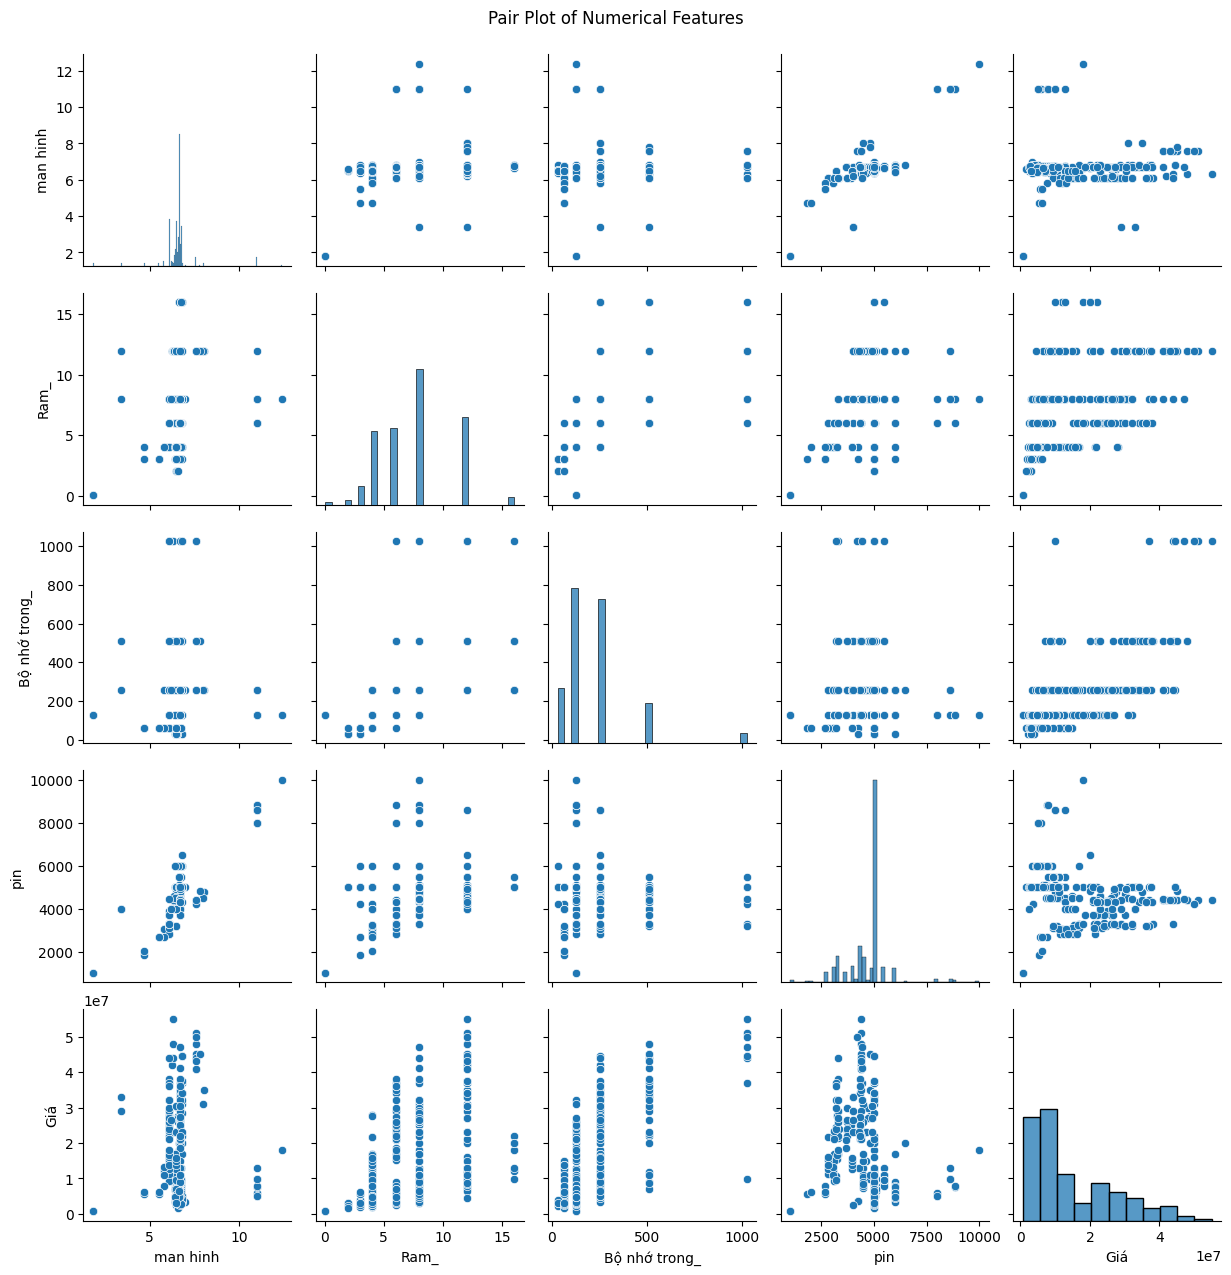

In [116]:
sns.pairplot(df_[['man hinh', 'Ram_', 'Bộ nhớ trong_', 'pin', 'Giá']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

the correlation between numerical features

In [117]:
df_.isnull().sum()

Hãng sản xuất    0
Bộ nhớ trong_    0
Ram_             0
Chipset(CPU)     0
man hinh         0
pin              0
Primary          0
Ultra_Wide       0
Telephoto        0
Giá              0
dtype: int64

In [118]:
df_sub = df_.drop(columns=['Hãng sản xuất', 'Chipset(CPU)'])

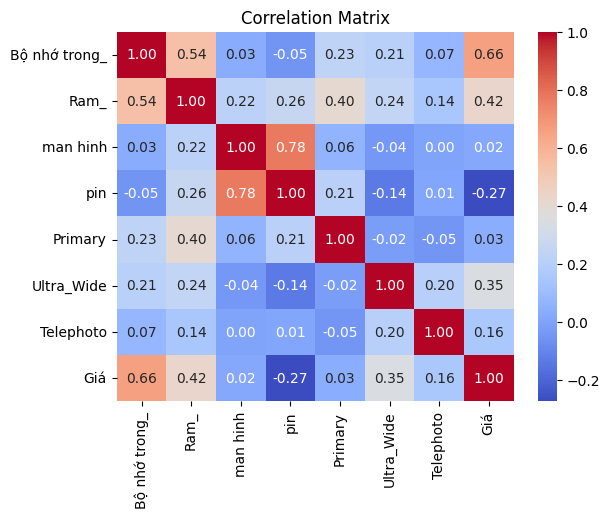

In [119]:
sns.heatmap(df_sub.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [120]:
df_.to_csv('/home/hadoop/Predict-Phone-Price/ML/phone_data_ml.csv')